# Horse Survival Prediction

## 1. Exploratory data analysis
---


In [1]:
# Importing libraries for data visualization
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Seed for result reproducibility
seed = 10
random.seed(seed)
np.random.seed(seed)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 1.1 Importing the data



In [2]:
df = pd.read_csv('/kaggle/input/horse-colic/horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


### 1.2 EDA

Separation of categorical and numerical variables.

In [3]:
quant_cols = ['rectal_temp','pulse','respiratory_rate','nasogastric_reflux_ph','packed_cell_volume','total_protein','abdomo_protein']
quali_cols = [c for c in df.columns.to_list()  if c not in quant_cols]

Converting all categorical variables to category type.

In [4]:
for c in list(df.columns):
  if c not in quant_cols:
    df[c] = df[c].astype('category')

In [5]:
# Checking the data types
df.dtypes

surgery                  category
age                      category
hospital_number          category
rectal_temp               float64
pulse                     float64
respiratory_rate          float64
temp_of_extremities      category
peripheral_pulse         category
mucous_membrane          category
capillary_refill_time    category
pain                     category
peristalsis              category
abdominal_distention     category
nasogastric_tube         category
nasogastric_reflux       category
nasogastric_reflux_ph     float64
rectal_exam_feces        category
abdomen                  category
packed_cell_volume        float64
total_protein             float64
abdomo_appearance        category
abdomo_protein            float64
outcome                  category
surgical_lesion          category
lesion_1                 category
lesion_2                 category
lesion_3                 category
cp_data                  category
dtype: object

In [6]:
# Function to find the entropy of each column.
from math import e

def pandas_entropy(column,base=None):
  vc = pd.Series(column).value_counts(normalize=True,sort=False)
  base = e if base is None else base
  return -(vc*np.log(vc)/np.log(base)).sum()

In [7]:
# Visualization of the entropy for each column of the DataFrame in ascending order.
entropy_arr = []
for c in quali_cols:
  entropy_arr.append([c,pandas_entropy(df[c],len(df[c].unique()))])

entropy_df = pd.DataFrame(entropy_arr, columns=['Field','Entropy'])
entropy_df.sort_values('Entropy', inplace=True,ascending=True)

entropy_df

,Field,Entropy
19,lesion_3,0.032322
18,lesion_2,0.081243
1,age,0.403121
6,capillary_refill_time,0.465684
4,peripheral_pulse,0.563988
11,nasogastric_reflux,0.671516
10,nasogastric_tube,0.693016
8,peristalsis,0.724566
3,temp_of_extremities,0.762726
12,rectal_exam_feces,0.775845


### 1.3 Missing Value Analysis

Counting the missing data per column as a percentage of the total rows.

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing,'data_type':df.dtypes})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)

missing_value_df

,column_name,percent_missing,data_type
nasogastric_reflux_ph,nasogastric_reflux_ph,82.274247,float64
abdomo_protein,abdomo_protein,66.220736,float64
abdomo_appearance,abdomo_appearance,55.183946,category
abdomen,abdomen,39.464883,category
nasogastric_reflux,nasogastric_reflux,35.451505,category
nasogastric_tube,nasogastric_tube,34.782609,category
rectal_exam_feces,rectal_exam_feces,34.113712,category
peripheral_pulse,peripheral_pulse,23.076923,category
rectal_temp,rectal_temp,20.066890,float64
respiratory_rate,respiratory_rate,19.397993,float64


Visualization of missing data

In [9]:
%matplotlib inline
plt.close('all')

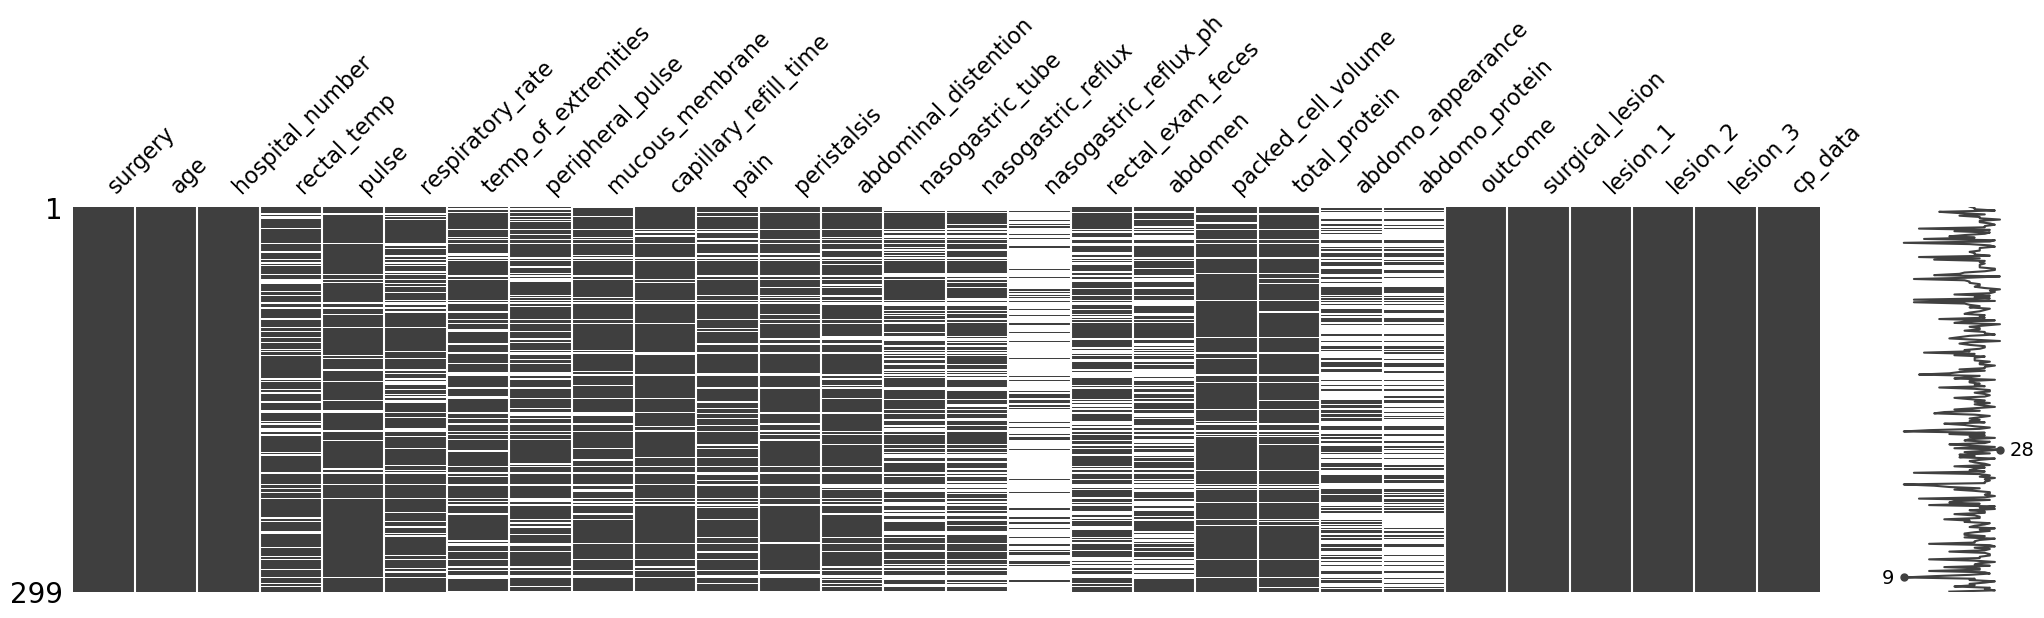

In [10]:
msno.matrix(df, figsize=(25,5));

*  There are many null values in the dataset. The columns 'nasogastric_reflux_ph' and 'abdomo_protein' have the highest percentage of null values, with 82.3% and 66.2% respectively.
*   The fields 'Lesion 2' and 'Lesion 3' have low entropy. A single class represents over 97% of the total rows.

## 2. Preprocessing

In [11]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,df.columns!='outcome'], df['outcome'], test_size=0.2, random_state=seed,stratify=df['outcome'])

In the section below, we will create a pipeline to process the numerical and categorical data.


### 2.1 Data Cleaning

The data analysis revealed that the columns 'lesion_2' and 'lesion_3' do not provide much information and will be deleted. The column 'hospital_number' will also be deleted as it is not relevant for the analysis.




Some columns, such as 'nasogastric_reflux_ph' and 'abdomo_protein', have more than 50% missing data. Columns with more than 80% missing data will be deleted.

In [12]:
from sklearn.preprocessing import FunctionTransformer
from sklearn import set_config
set_config(transform_output="pandas")

In [13]:
drop_cols = ['lesion_1','lesion_2','lesion_3','hospital_number','nasogastric_reflux_ph','nasogastric_tube']

def drop_columns(df:pd.DataFrame):
  return df.drop(columns=['lesion_1','lesion_2','lesion_3','hospital_number','nasogastric_reflux_ph','nasogastric_tube'])

drop_transformer = FunctionTransformer(func=drop_columns)

The variable 'lesion_1' consists of four codes. This variable will be splited into four columns.



In [14]:
new_cols = ['lesion_site','lesion_type','lesion_subtype','lesion_code']
def split_lesion(df:pd.DataFrame):
  import re
  df = pd.concat([df,pd.DataFrame(columns=['lesion_site','lesion_type','lesion_subtype','lesion_code'])])
  for i, v in df['lesion_1'].iteritems():
    if v == 0:
      df.loc[i,['lesion_site','lesion_type','lesion_subtype','lesion_code']] = ['-1','-1','-1','-1']
    else:
      m = re.search('(11|00|[1-9])([1-4])([0-2])(10|[0-9])',str(v))
      if m is not None:
        df.loc[i,['lesion_site','lesion_type','lesion_subtype','lesion_code']] = [m.group(1),m.group(2),m.group(3),m.group(4)]
  return df

split_transformer = FunctionTransformer(func=split_lesion)

### 2.2 Data Normalization

In [15]:
# z-score normalization for numerical columns
import scipy.stats as stats
def zscore(df:pd.DataFrame):
  return stats.zscore(df)

zscore_transformer = FunctionTransformer(func=zscore)

### 2.3 Handling Missing Values

In [16]:
# Ordinal encoder for categorial variable.
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)

In [17]:
# Interative Imputer to handling missing data
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

extra_tree_imputer = IterativeImputer(ExtraTreesRegressor())

In [18]:
# A transformer to round the categorical data after handling missing data.
def round(df:pd.DataFrame):
  return np.round(df)

round_transformer = FunctionTransformer(func=round)

### 2.4 Encoding

In [19]:
# One hot enconding to categorical variables
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

one_hot_enc = OneHotEncoder(sparse_output=False,handle_unknown = 'ignore',drop='first')

Creating a pipeline to apply the corresponding transformations to the numeric and categorical columns

In [20]:
# categorial columns
cats = [c for c in X_train.select_dtypes(include='category').columns if c not in drop_cols] + new_cols

In [21]:
# numerical columns
nums = [c for c in X_train.select_dtypes(exclude='category').columns if c not in drop_cols]

In [22]:
from sklearn.pipeline import make_pipeline
categorical_pipe = make_pipeline(encoder,extra_tree_imputer,round_transformer,one_hot_enc)
mumerical_pipe = make_pipeline(extra_tree_imputer,zscore_transformer)

In [23]:
from sklearn.compose import ColumnTransformer
transformers = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe,cats),
        ('numerical',mumerical_pipe,nums)
    ],verbose_feature_names_out = False
)

In [24]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("split",split_transformer),
    ("drop",drop_transformer),
    ('preprocessing', transformers)
])

In [25]:
pipeline

Pipeline(steps=[('split',
                 FunctionTransformer(func=<function split_lesion at 0x79fbdc171900>)),
                ('drop',
                 FunctionTransformer(func=<function drop_columns at 0x79fbd82335b0>)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('iterativeimpute...
                                                   'lesion_subtype',
                                                   'lesion_code']),
                                                 ('numerical',
                                                  Pipeline(steps=[('iterativeimputer',
                                                                   IterativeImputer(estimator=ExtraTreesRegressor())),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function zscore at 0x79fbd82336d0>))]),
                                                  ['rectal_temp', 'pulse',
                                                   'respiratory_rate',
                                                   'packed_cell_volume',
                                                   'total_protein',
                                                   'abdomo_protein'])],
                                   verbose_feature_names_out=False))])

Applying the pipeline to the training and test data

In [26]:
X_train = pipeline.fit_transform(X_train)

/tmp/ipykernel_20/423678370.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in df['lesion_1'].iteritems():
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [27]:
X_test = pipeline.transform(X_test)

/tmp/ipykernel_20/423678370.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in df['lesion_1'].iteritems():


Checking missing data

In [28]:
print("null values X_train = {}".format(X_train.isnull().sum().sum()))
print("null values X_test = {}".format(X_test.isnull().sum().sum()))

null values X_train = 0
null values X_test = 0


## 3. Machine Learning

The following classification algorithms will be used for training:

*   Decision Tree Classifier
*   Logistic Regression
*   Random Forest Classifier

Each algorithm will be trained using BayesSearchCV, and for presenting the results, the model with the best score will be chosen in each case.

The 'cv' (cross-validation) parameter will be a StratifiedKFold object, given that the categorical variable 'outcome' is slightly imbalanced.




In [29]:
# List of models that achieved the highest scores for each classification algorithm
models = {}
#List containing cross-validation training parameters from the best model.
best_models_train = {}
#List containing the estimators that will be tested.
estimators = {}
#List containing the parameter space for each estimator.
params_grid = {}
model_keys = ['DT','LogReg','RF']
global results
results = pd.DataFrame(columns=['Params','Best_Score','Accuracy','Kappa','Precision','Recall','F1','ROC_AUC'],index=model_keys)

### 3.1 Estimators

In [30]:
!pip install scikit-optimize

In [31]:
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import time

In [32]:
# Function that returns the best model for each algorithm and displays the best_score and best_params
def train_models(model_name,estimator,params,X_train,y_train):
  start_time = time.time()
  kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)

  bayes_search = BayesSearchCV(estimator=estimator,search_spaces=params,cv=kfold,n_iter=20,return_train_score=True)

  bayes_search.fit(X_train, y_train)
  print('-'*50,model_name,'-'*50)
  print ("Best Score: {}".format(bayes_search.best_score_))
  print ("Best params: {}".format(bayes_search.best_params_))
  execution_time = time.time() - start_time
  print("Execution time:", execution_time, "seconds")
  
  return bayes_search

In [33]:
# Add DecisionTreeClassifier
from sklearn import tree

params = {'max_depth':Integer(3,15),
          'min_samples_leaf':Integer(3,20),
          'min_samples_split':Integer(8,20),
          'criterion':Categorical(['gini','entropy'])}

estimators['DT']  = tree.DecisionTreeClassifier(random_state=seed)
params_grid['DT'] = params

In [34]:
# Add LogisticRegression
from sklearn.linear_model import LogisticRegression

params = [
            {'solver':Categorical(['newton-cg', 'lbfgs', 'liblinear','sag','saga']),
            'penalty':Categorical(['l2']),
            'C': Real(1e-4, 1e+6, prior='log-uniform'),
            'max_iter':[100000],
            },
            {'solver':Categorical([ 'liblinear','saga']),
            'penalty':Categorical(['l1']),
            'C': Real(1e-4, 1e+6, prior='log-uniform'),
            'max_iter':[100000],
            },
          ]

estimators['LogReg']  = LogisticRegression(random_state=seed)
params_grid['LogReg'] = params

In [35]:
# Add RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

params = {
    'bootstrap': [True],
    'max_depth': Integer(5,20),
    'min_samples_leaf': Integer(2,5),
    'min_samples_split': Integer(4,12),
    'n_estimators': Integer(100,1000)
}

estimators['RF']  = RandomForestClassifier(random_state=seed)
params_grid['RF'] = params

In [36]:
#Training each model
for model_name,estimator in estimators.items():
  best_model = train_models(model_name,estimator,params_grid[model_name],X_train,y_train)
  models[model_name] = best_model.best_estimator_
  results.loc[model_name,'Params'] = str(best_model.best_params_)
  results.loc[model_name,'Best_Score'] = str(best_model.best_score_)

-------------------------------------------------- DT --------------------------------------------------
Best Score: 0.6946808510638297
Best params: OrderedDict([('criterion', 'gini'), ('max_depth', 11), ('min_samples_leaf', 20), ('min_samples_split', 8)])
Execution time: 20.511468648910522 seconds
-------------------------------------------------- LogReg --------------------------------------------------
Best Score: 0.7740248226950355
Best params: OrderedDict([('C', 0.1996490699372578), ('max_iter', 100000), ('penalty', 'l2'), ('solver', 'newton-cg')])
Execution time: 106.93807601928711 seconds
-------------------------------------------------- RF --------------------------------------------------
Best Score: 0.7573581560283689
Best params: OrderedDict([('bootstrap', True), ('max_depth', 7), ('min_samples_leaf', 2), ('min_samples_split', 4), ('n_estimators', 1000)])
Execution time: 202.0386257171631 seconds


### 3.2 Model Evaluation

In [37]:
# Function that displays ROC_AUC chart
from itertools import combinations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
def plot_roc_(y_train,y_test,y_score,model_name):

  label_binarizer = LabelBinarizer().fit(y_train)
  fpr_grid = np.linspace(0.0, 1.0, 1000)
  pair_list = list(combinations(np.unique(y_train), 2))

  pair_scores = []
  mean_tpr = dict()

  for ix, (label_a, label_b) in enumerate(pair_list):

      a_mask = y_test == label_a
      b_mask = y_test == label_b
      ab_mask = np.logical_or(a_mask, b_mask)

      a_true = a_mask[ab_mask]
      b_true = b_mask[ab_mask]

      idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
      idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

      fpr_a, tpr_a, _ = roc_curve(a_true, y_score[ab_mask, idx_a])
      fpr_b, tpr_b, _ = roc_curve(b_true, y_score[ab_mask, idx_b])

      mean_tpr[ix] = np.zeros_like(fpr_grid)
      mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
      mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
      mean_tpr[ix] /= 2
      mean_score = auc(fpr_grid, mean_tpr[ix])
      pair_scores.append(mean_score)
  macro_roc_auc_ovo = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovo",
    average="macro",
  )
  results.loc[model_name,'ROC_AUC'] = macro_roc_auc_ovo
  ovo_tpr = np.zeros_like(fpr_grid)

  fig, ax = plt.subplots(figsize=(10, 10))
  for ix, (label_a, label_b) in enumerate(pair_list):
      ovo_tpr += mean_tpr[ix]
      plt.plot(
          fpr_grid,
          mean_tpr[ix],
          label=f"Mean {label_a} vs {label_b} (AUC = {pair_scores[ix]:.2f})",
      )

  ovo_tpr /= sum(1 for pair in enumerate(pair_list))

  plt.plot(
      fpr_grid,
      ovo_tpr,
      label=f"One-vs-One macro-average (AUC = {macro_roc_auc_ovo:.2f})",
      linestyle=":",
      linewidth=4,
  )
  plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
  plt.axis("square")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Extension of Receiver Operating Characteristic\nto One-vs-One multiclass")
  plt.legend()
  plt.show()

In [38]:
# Function that calculates predicted values, score metrics, and displays the confusion matrix
def predict_and_evaluate(model_name, X_test, y_test):

  model = models[model_name]

  y_pred = model.predict(X_test) 

  # Accuracy
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  from sklearn.metrics import precision_score
  macro_averaged_precision = precision_score(y_test, y_pred, average = 'macro')
  print(f"Macro-averaged Precision score: {macro_averaged_precision}")

  from sklearn.metrics import recall_score
  macro_averaged_recall = recall_score(y_test, y_pred, average = 'macro')
  print(f"Macro-averaged recall: {macro_averaged_recall}")

  #F1
  from sklearn.metrics import f1_score
  macro_averaged_f1 = f1_score(y_test, y_pred,average='macro')
  print(f"Macro-Averaged F1 score: {macro_averaged_f1}")

  results.loc[model_name,'Accuracy'] = accuracy
  results.loc[model_name,'Kappa'] = kappa
  results.loc[model_name,'Precision'] = macro_averaged_precision
  results.loc[model_name,'Recall'] = macro_averaged_recall
  results.loc[model_name,'F1'] = macro_averaged_f1

  # Confusion Matrix
  y_pred_class = y_pred
  y_test_class = y_test

  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_test_class, y_pred_class)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f",xticklabels = np.unique(y_test_class), yticklabels = np.unique(y_test_class))
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()




--------------------------------------------------DT--------------------------------------------------
Train Metrics
Accuracy:  0.7364016736401674
Kappa:  0.5067806603773586
Macro-averaged Precision score: 0.6906658680243586
Macro-averaged recall: 0.6524804742433092
Macro-Averaged F1 score: 0.6652156363523457


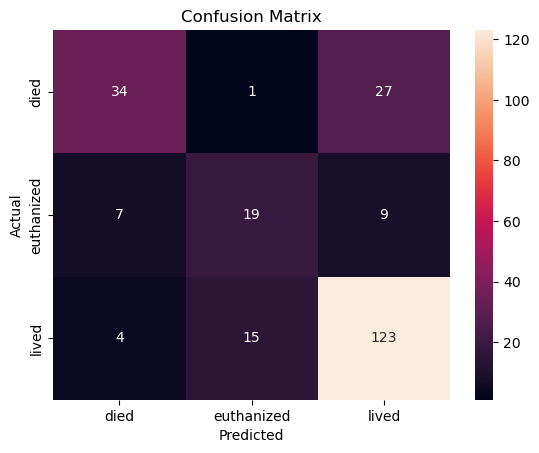

Test Metrics
Accuracy:  0.7666666666666667
Kappa:  0.5876288659793815
Macro-averaged Precision score: 0.7227716727716729
Macro-averaged recall: 0.7203703703703704
Macro-Averaged F1 score: 0.7167449139280125


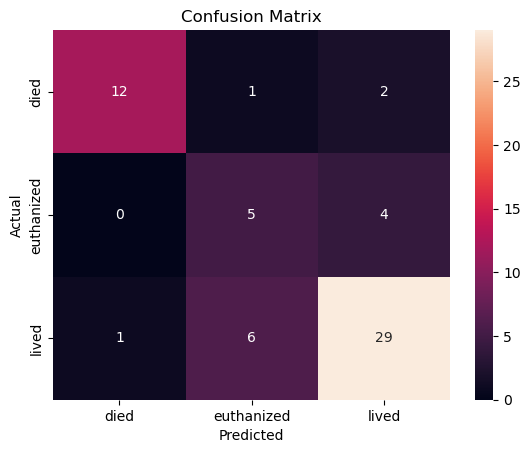

Probability Distributions and the ROC Curves One vs ONe


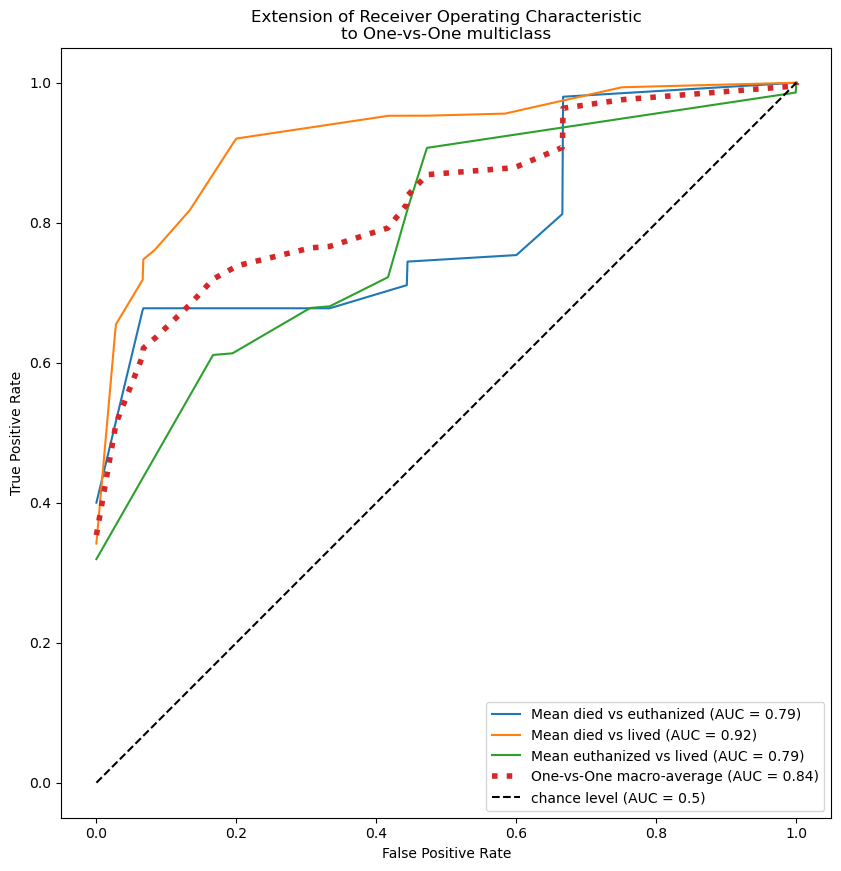

--------------------------------------------------LogReg--------------------------------------------------
Train Metrics
Accuracy:  0.8828451882845189
Kappa:  0.7815213842637936
Macro-averaged Precision score: 0.8928583399171633
Macro-averaged recall: 0.8023950152528071
Macro-Averaged F1 score: 0.8311643247983832


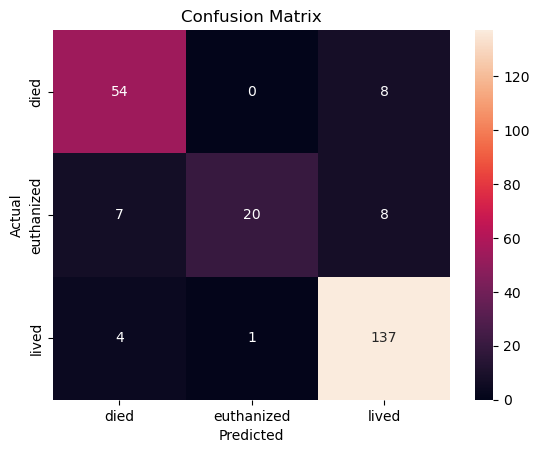

Test Metrics
Accuracy:  0.75
Kappa:  0.5275590551181102
Macro-averaged Precision score: 0.603192559074912
Macro-averaged recall: 0.612962962962963
Macro-Averaged F1 score: 0.5976709401709401


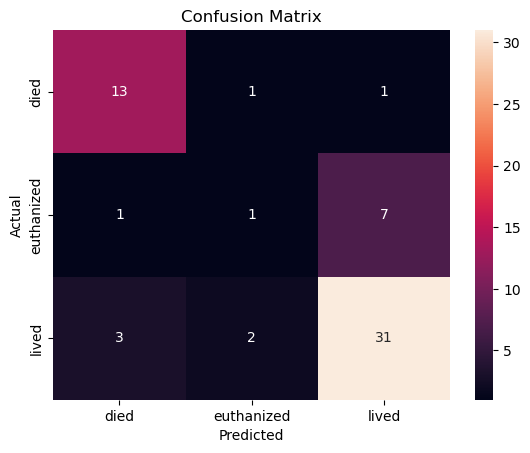

Probability Distributions and the ROC Curves One vs ONe


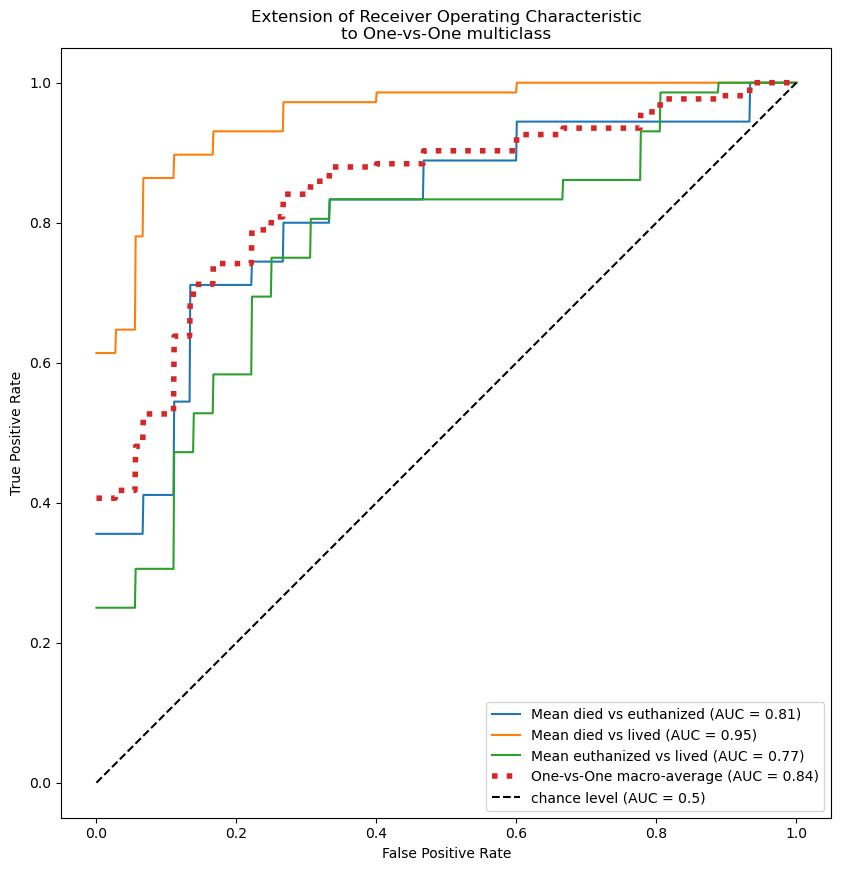

--------------------------------------------------RF--------------------------------------------------
Train Metrics
Accuracy:  0.9414225941422594
Kappa:  0.8912400455062571
Macro-averaged Precision score: 0.9593681917211329
Macro-averaged recall: 0.8874039938556068
Macro-Averaged F1 score: 0.9165323701028063


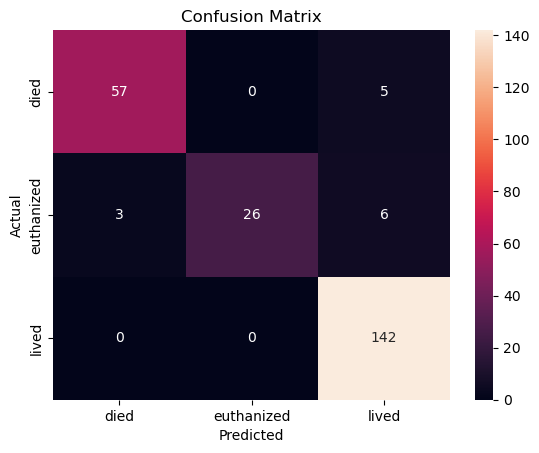

Test Metrics
Accuracy:  0.75
Kappa:  0.5153473344103392
Macro-averaged Precision score: 0.6212737127371274
Macro-averaged recall: 0.6
Macro-Averaged F1 score: 0.5906763487408649


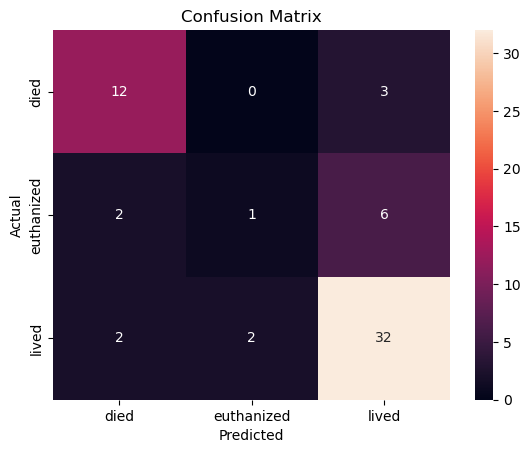

Probability Distributions and the ROC Curves One vs ONe


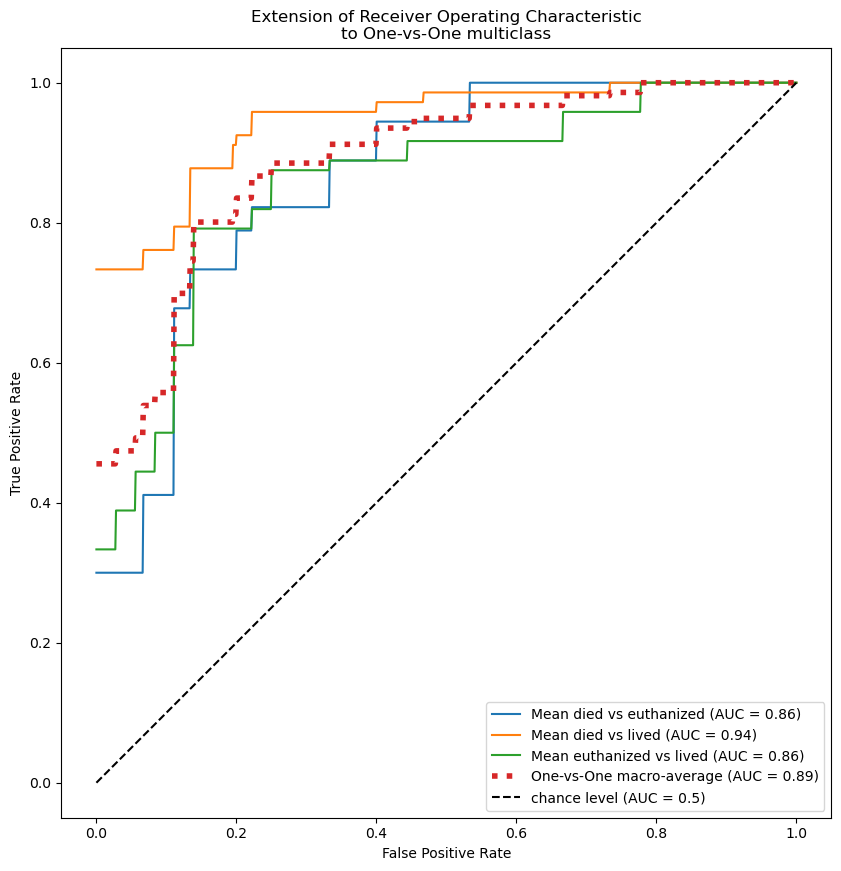

In [39]:
# Loop through the best models, calculating predicted values, displaying score metrics, and generating the ROC_AUC graph
for name, model in models.items():
  print(('-'*50 + '{}' + '-'*50).format(name))
  print('Train Metrics')
  predict_and_evaluate(name, X_train, y_train)
  print('Test Metrics')
  predict_and_evaluate(name, X_test, y_test)
  print("Probability Distributions and the ROC Curves One vs ONe")
  y_proba = model.predict_proba(X_test)
  y_test_class = y_test 
  y_train_class = y_train
  plot_roc_(y_train_class,y_test_class,y_proba,name)

In [40]:
# Display summary of score metrics by algorithm
pd.set_option('max_colwidth',1000)
results.sort_values('Best_Score', inplace=True,ascending=False)
results

,Params,Best_Score,Accuracy,Kappa,Precision,Recall,F1,ROC_AUC
LogReg,"OrderedDict([('C', 0.1996490699372578), ('max_iter', 100000), ('penalty', 'l2'), ('solver', 'newton-cg')])",0.7740248226950355,0.75,0.527559,0.603193,0.612963,0.597671,0.844547
RF,"OrderedDict([('bootstrap', True), ('max_depth', 7), ('min_samples_leaf', 2), ('min_samples_split', 4), ('n_estimators', 1000)])",0.7573581560283689,0.75,0.515347,0.621274,0.6,0.590676,0.887963
DT,"OrderedDict([('criterion', 'gini'), ('max_depth', 11), ('min_samples_leaf', 20), ('min_samples_split', 8)])",0.6946808510638297,0.766667,0.587629,0.722772,0.72037,0.716745,0.835082
